In [2]:
import webbrowser as wb
wb.open("https://www.scaler.com/academy/mentee-dashboard/class/83716/project/problems/17972?navref=cl_tt_crd_sl")
path=!cd
import os
os.startfile(path[0]+'\\Other')

**Understand Business Problem**


**Context:**

Jamboree has helped thousands of students make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.


**Problem Statement:**

Help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

**Column Profiling:**

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)
- Exploratory Data Analysis
- Linear Regression

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [200]:
pwd

'C:\\Users\\mayan\\Desktop\\Portfolio Projects\\ML_Supervised_Regression\\Jamboree_Admission_Probability_Predictor'

In [23]:
import pandas as pd
df = pd.read_csv('Data_Jamboree.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [41]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa',
       'research', 'chance_of_admit'],
      dtype='object')

In [25]:
df.rename(columns={'chance_of_admit_':'chance_of_admit'}, inplace=True)
df.rename(columns={'lor_':'lor'}, inplace=True)

In [26]:
df.drop(columns=['serial_no.'], inplace=True)

In [7]:
df.info()
# Check Misssing val columns
# Check Dtype change if needed 
# df['date'] = pd.to_datetime(df['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gre_score          500 non-null    int64  
 1   toefl_score        500 non-null    int64  
 2   university_rating  500 non-null    int64  
 3   sop                500 non-null    float64
 4   lor                500 non-null    float64
 5   cgpa               500 non-null    float64
 6   research           500 non-null    int64  
 7   chance_of_admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
df.describe().round(2)

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
count,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,316.47,107.19,3.11,3.37,3.48,8.58,0.56,0.72
std,11.3,6.08,1.14,0.99,0.93,0.6,0.5,0.14
min,290.0,92.0,1.0,1.0,1.0,6.8,0.0,0.34
25%,308.0,103.0,2.0,2.5,3.0,8.13,0.0,0.63
50%,317.0,107.0,3.0,3.5,3.5,8.56,1.0,0.72
75%,325.0,112.0,4.0,4.0,4.0,9.04,1.0,0.82
max,340.0,120.0,5.0,5.0,5.0,9.92,1.0,0.97


In [26]:
df.nunique()
# Identity Records Columns

gre_score             49
toefl_score           29
university_rating      5
sop                    9
lor                    9
cgpa                 184
research               2
chance_of_admit       61
dtype: int64

In [59]:
df.dropna(inplace=True)

In [10]:
# df.groupby('date')['driver_id'].nunique().sort_index(ascending=True)

**Understand the data**
- Categoric Numeric

  University Rating, SOP, LOR, Research are numeric discrete variables (quantitative, finite set of possible values), and rest of the features are numeric continuous.
- Granularity
  
  has records of 500 students, each row contains details of their test scores. (No grouping required)    

In [15]:
df['university_rating'].value_counts(normalize=True,dropna=False).round(2).sort_index()
# NaN can be filled with KNN

1       0.07
2       0.25
3       0.32
4       0.21
5       0.15
<NA>     0.0
Name: university_rating, dtype: Float64

In [13]:
df['research'].value_counts(normalize=True,dropna=False)
# NaN can be filled with KNN

1       0.56
0       0.44
<NA>     0.0
Name: research, dtype: Float64

In [16]:
# df.groupby('driver_id')['education_level'].nunique().sort_values(ascending=False)

In [ ]:
# # Function to impute missing values based on column type if missing value are between 0-10%
# def impute_missing_values(df):
#     for col in df.columns[df.isna().mean() > 0]:  # Columns with missing values
#         if df[col].dtype == 'object':  # Categorical columns
#             df[col].fillna(df[col].mode()[0], inplace=True)  # Impute mode
#         elif pd.api.types.is_numeric_dtype(df[col]):  # Numeric columns
#             df[col].fillna(df[col].mean(), inplace=True)  # Impute mean
#         else:
#             print(f"Column {col} has an unsupported data type for imputation.")
#     return df

# # Apply the function
# df = impute_missing_values(df)

### Assumptions

#### Checking the overall linearity and correlation across all features using pairplot :

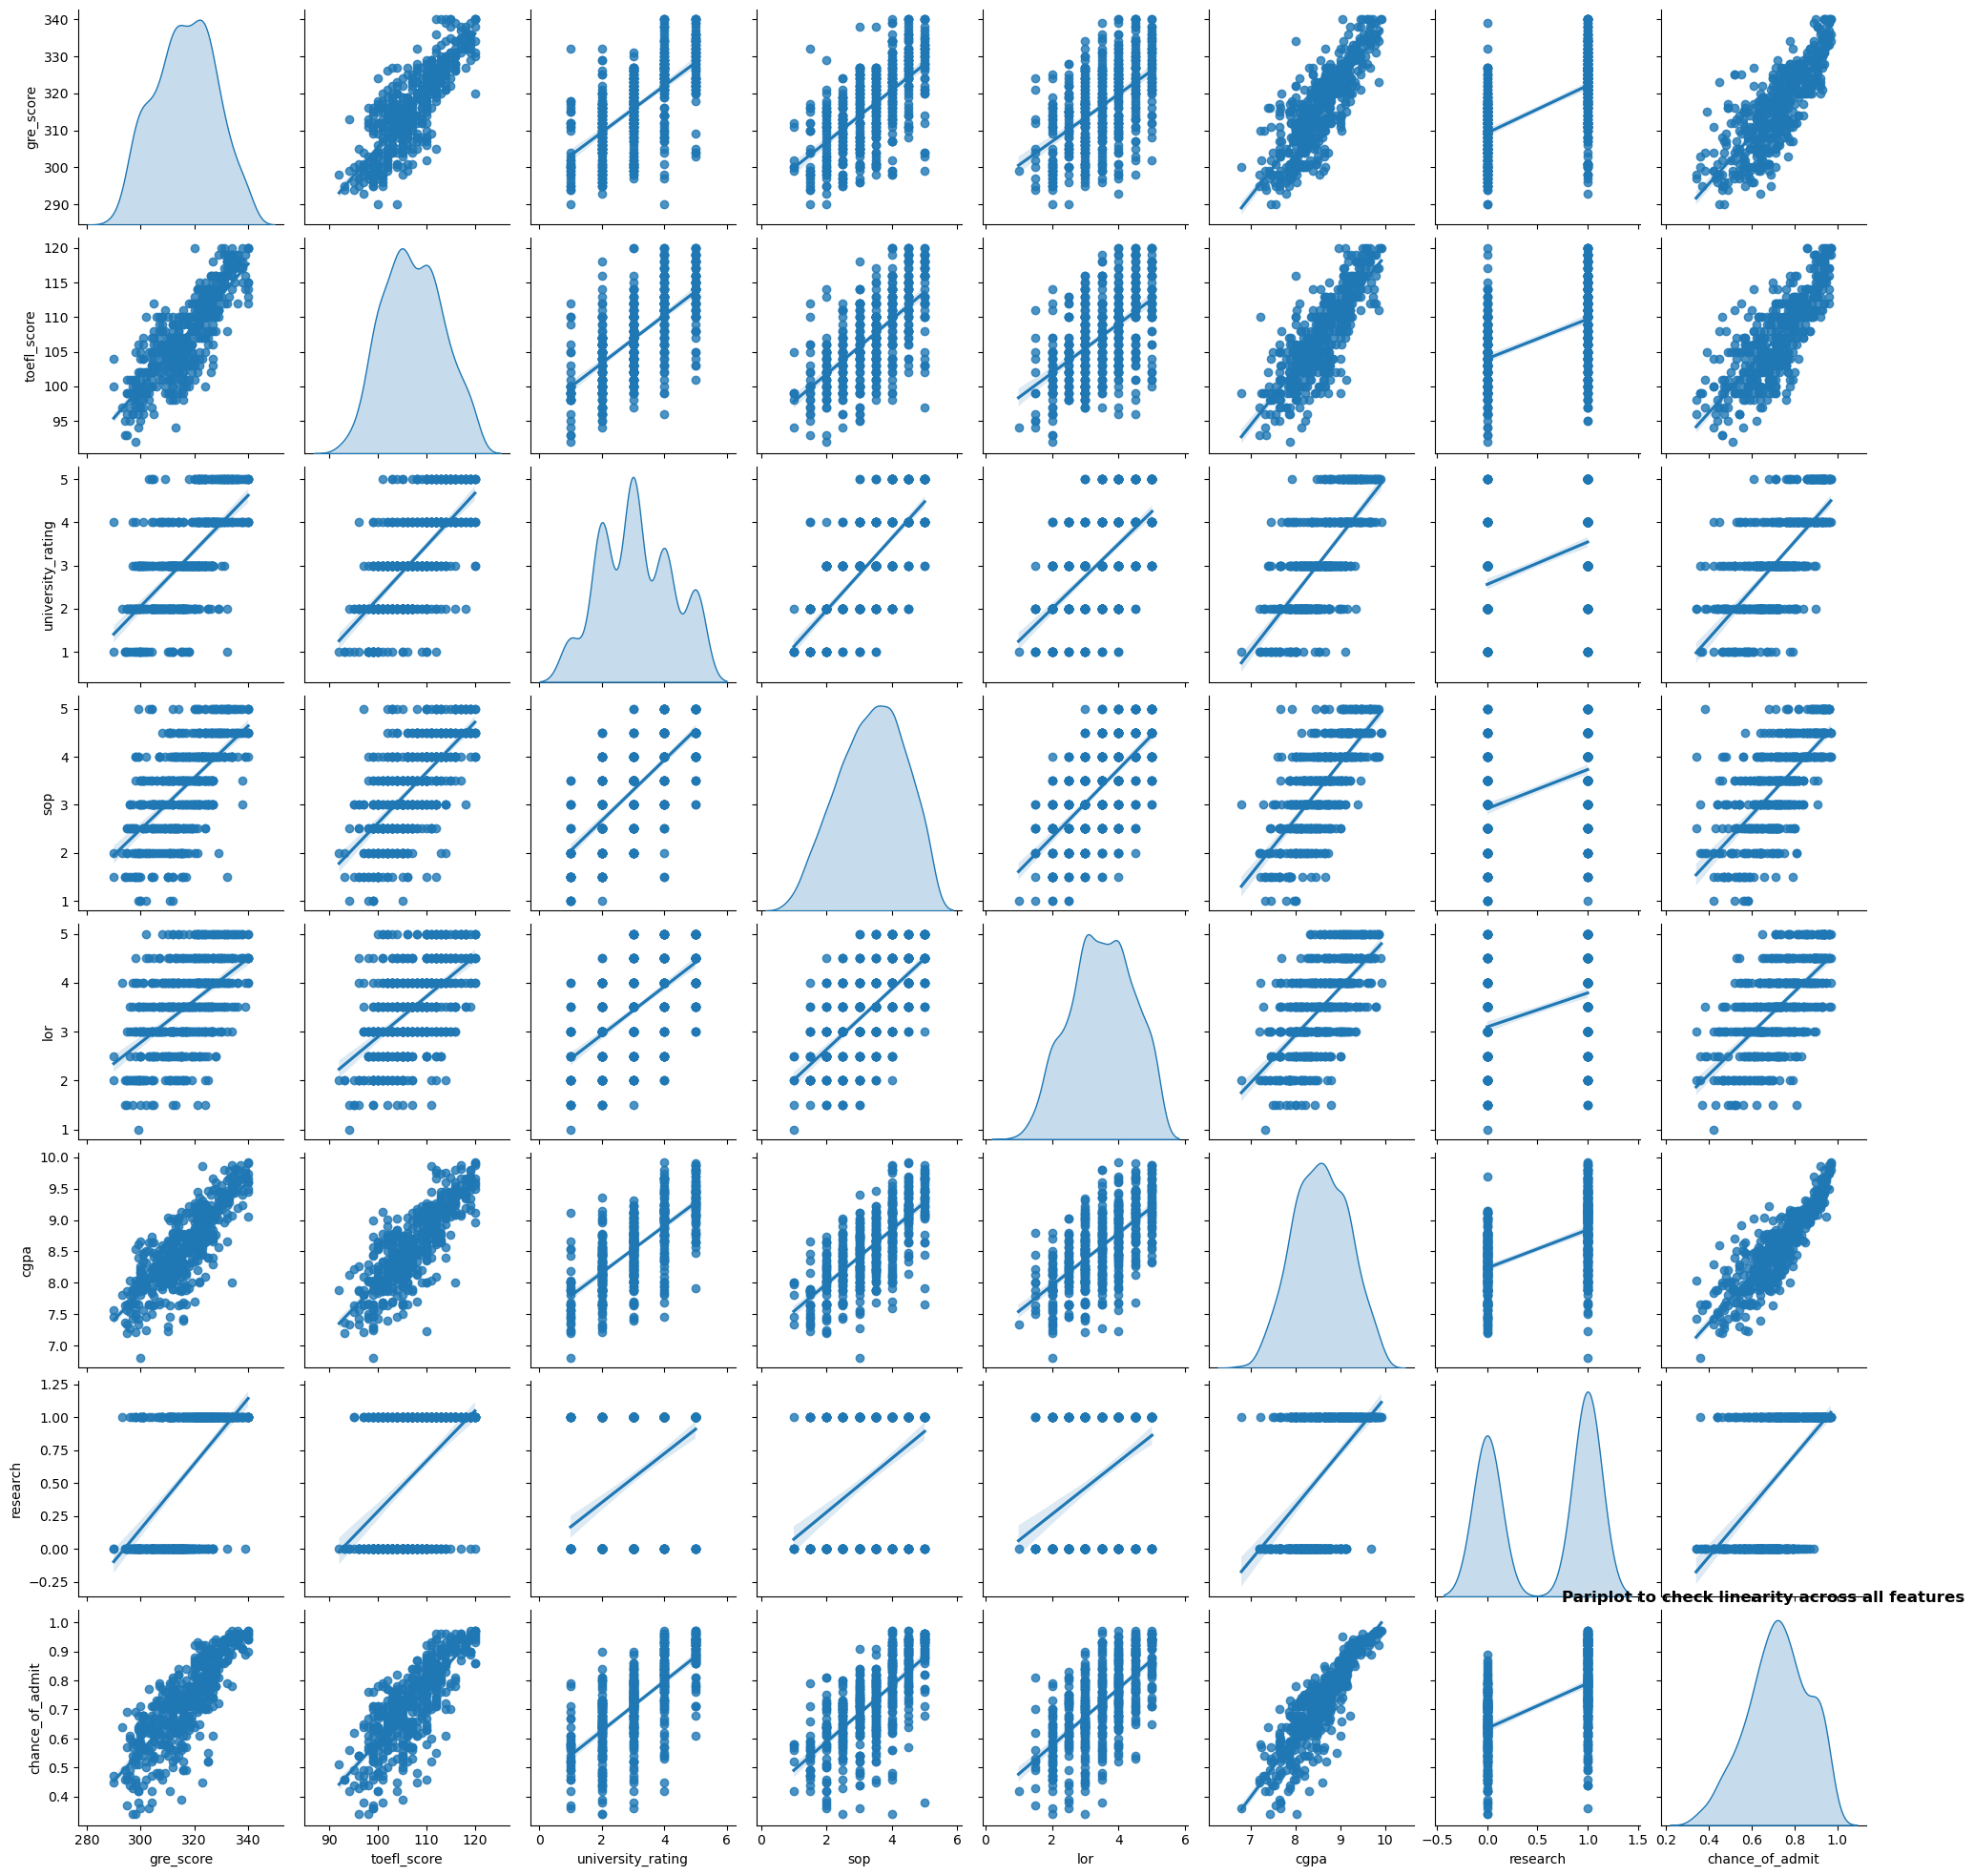

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
# numeric_df = df.select_dtypes(include=['number'])
# plt.figure(figsize = (8,8))
sns.pairplot(df, kind="reg", diag_kind="kde")  # or diag_kind="hist"
plt.title(f"Pariplot to check linearity across all features", fontweight = 'bold')
plt.show()

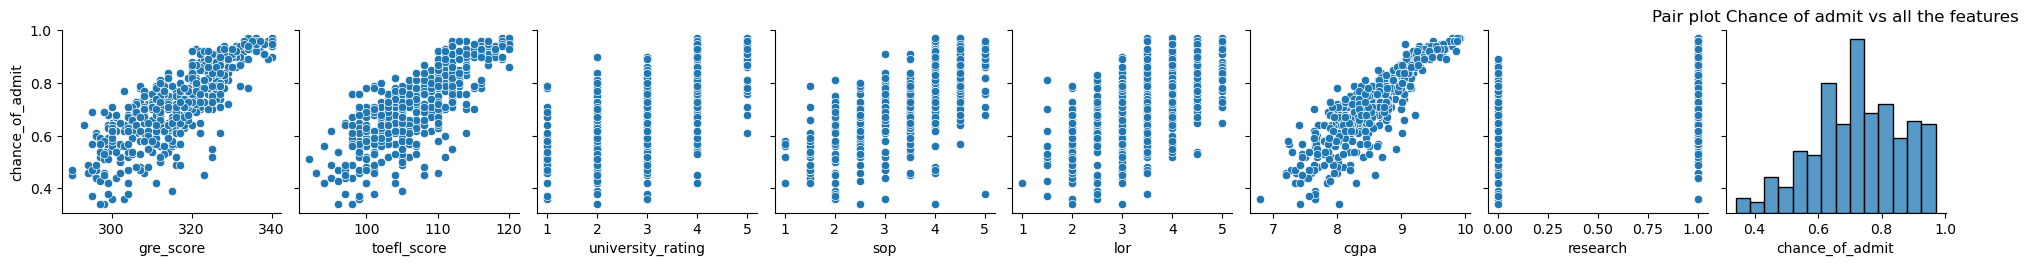

In [162]:
sns.pairplot(df,y_vars = ["chance_of_admit"])
plt.title("Pair plot Chance of admit vs all the features")
plt.show()

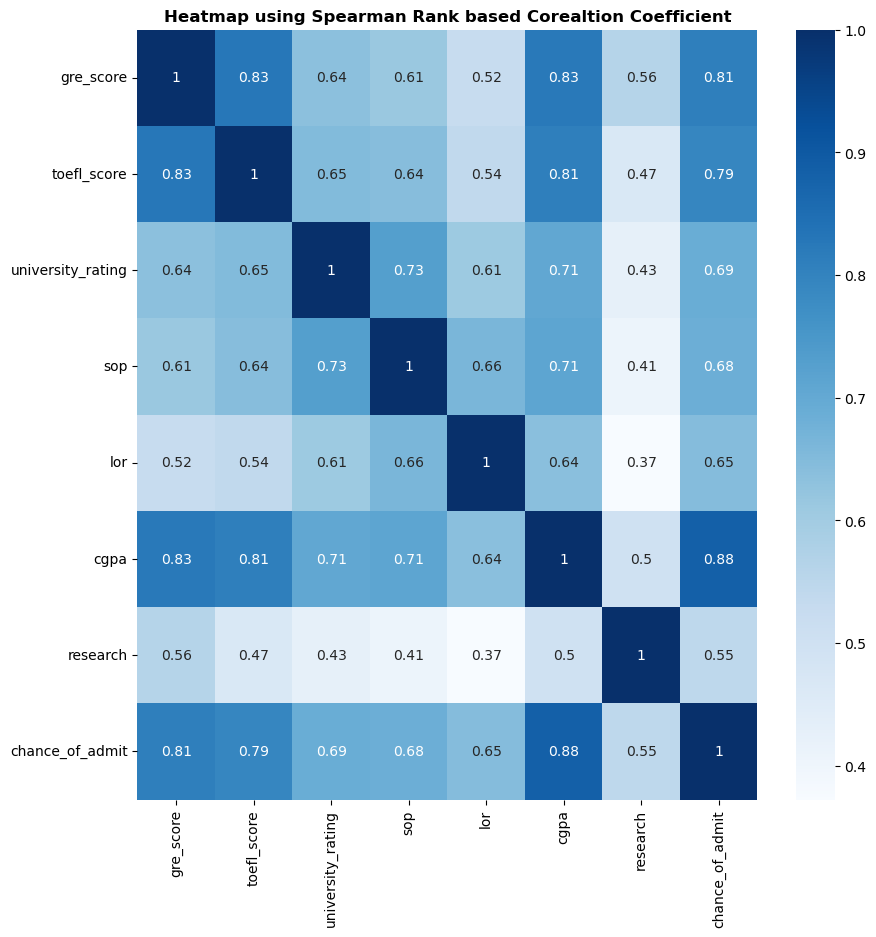

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
# numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True, cmap = "Blues")
plt.title(f"Heatmap using Spearman Rank based Corealtion Coefficient", fontweight = 'bold')
plt.show()

- Independent Variables (Input data): GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research
- Target/Dependent Variable : Chance of Admit (the value we want to predict)
- from above correlation heatmap , we can observe GRE score TOEFL score and CGPA have very high correlation with Change of admission. 
- University rating, SOP ,LOR and Research have comparatively slightly less correlated than other features.

In [201]:
def detect_outliers(data):
     length_before = len(data)
     Q1 = np.percentile(data,25)
     Q3 = np.percentile(data,75)
     IQR = Q3-Q1
     upperbound = Q3+1.5*IQR
     lowerbound = Q1-1.5*IQR
     if lowerbound < 0:
         lowerbound = 0
    
     length_after = len(data[(data>lowerbound)&(data<upperbound)])
     return f"{np.round((length_before-length_after)/length_before,4)} % Outliers data from input data found"

In [202]:
for col in df.columns:
 print(col," : ",detect_outliers(df[col]))

gre_score  :  0.0 % Outliers data from input data found
toefl_score  :  0.0 % Outliers data from input data found
university_rating  :  0.0 % Outliers data from input data found
sop  :  0.0 % Outliers data from input data found
lor  :  0.024 % Outliers data from input data found
cgpa  :  0.0 % Outliers data from input data found
research  :  0.44 % Outliers data from input data found
chance_of_admit  :  0.004 % Outliers data from input data found


In [13]:
detect_outliers(df)

'0.0 % Outliers data from input data found'

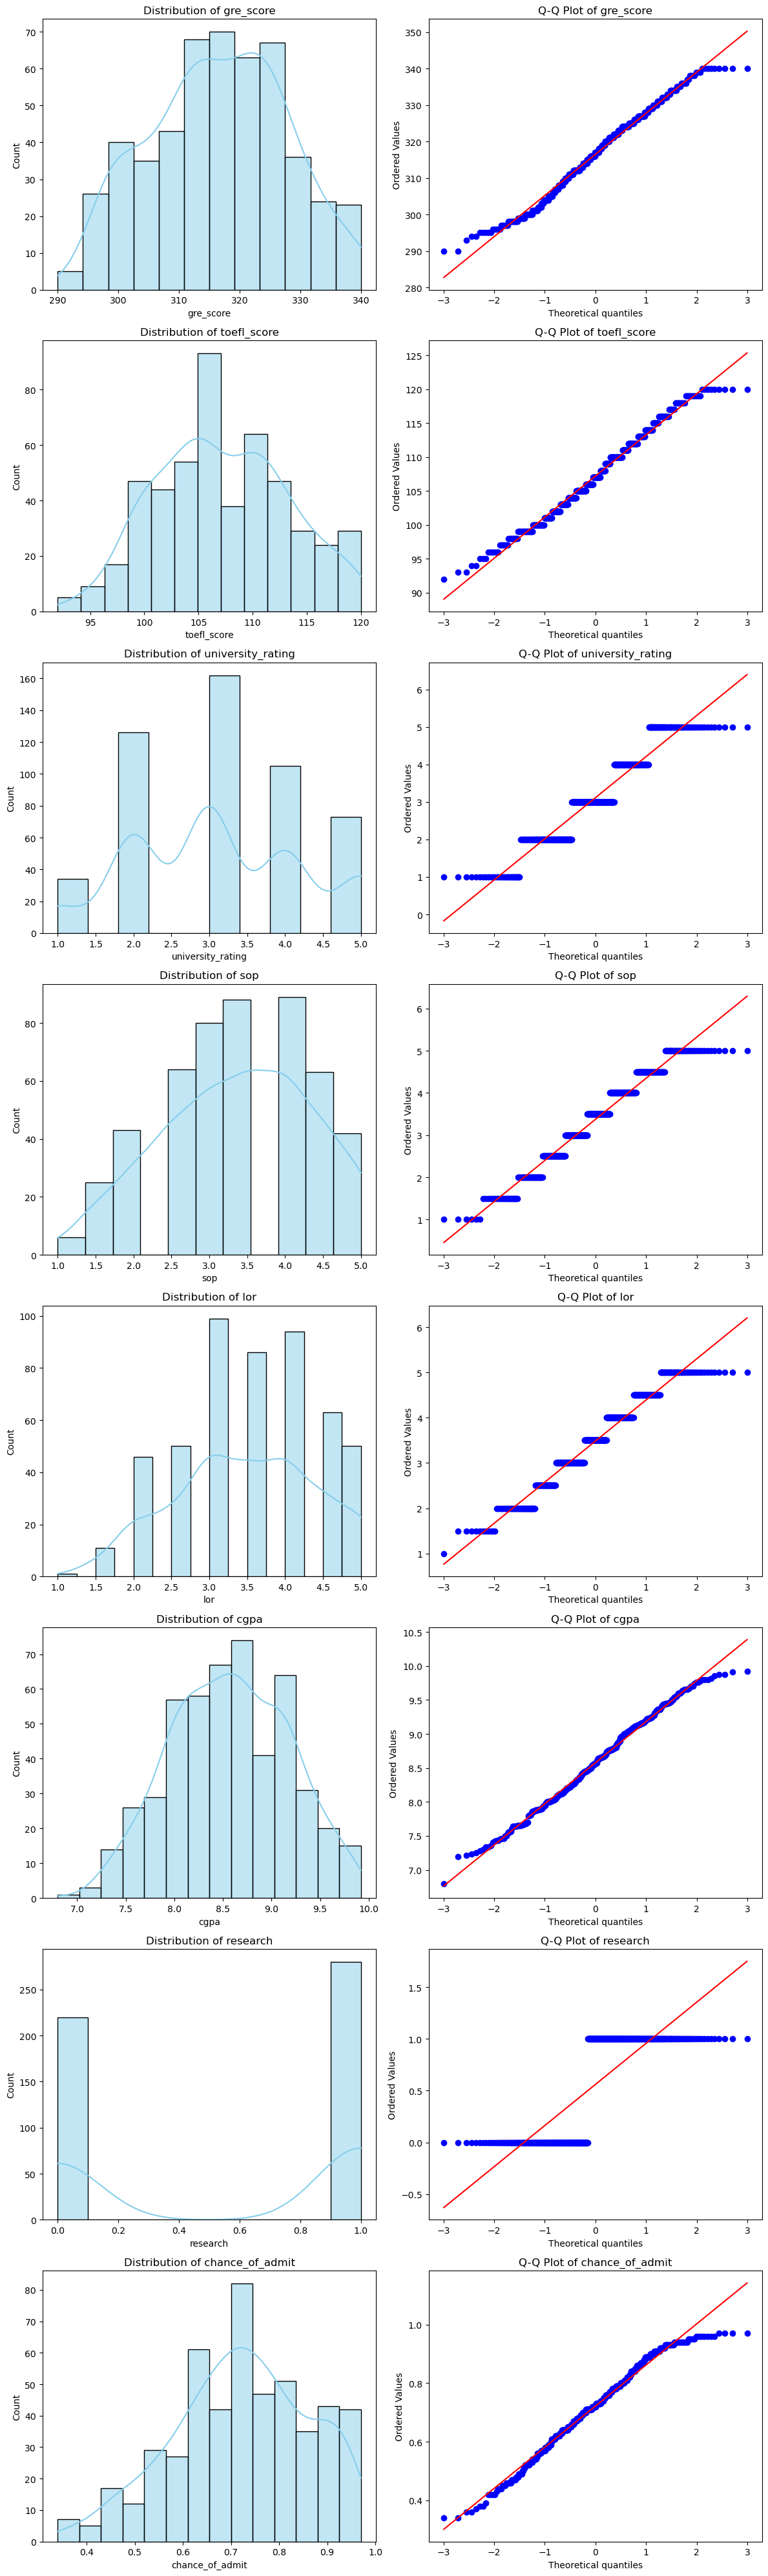

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# numerical_cols = df.select_dtypes(include='number').columns

# if making a single type plot
# plt.figure(figsize=(10, len(numeric_cols) * 4)) 

# Set up the figure if making multiple type plots
n_cols = 2
n_rows = len(numerical_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))

for i, col in enumerate(numerical_cols):
    # Distplot
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Distribution of {col}')
    
    # QQ Plot
    stats.probplot(df[col], dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot of {col}')

plt.tight_layout()
plt.show()


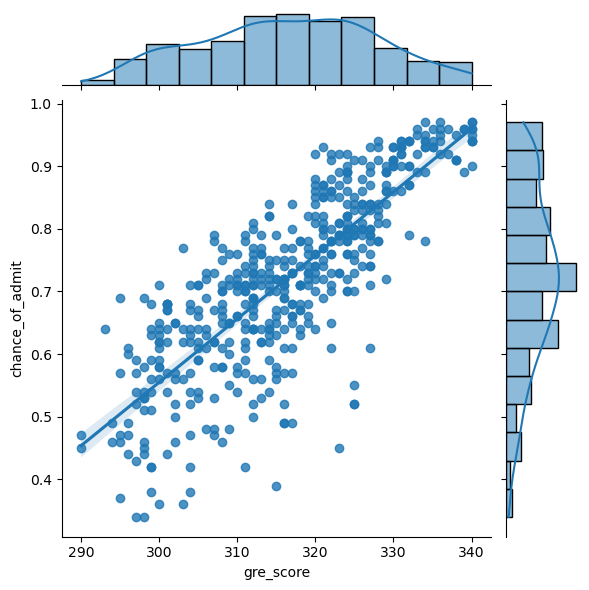

In [40]:
sns.jointplot(x="gre_score", y="chance_of_admit", data=df, kind="reg")

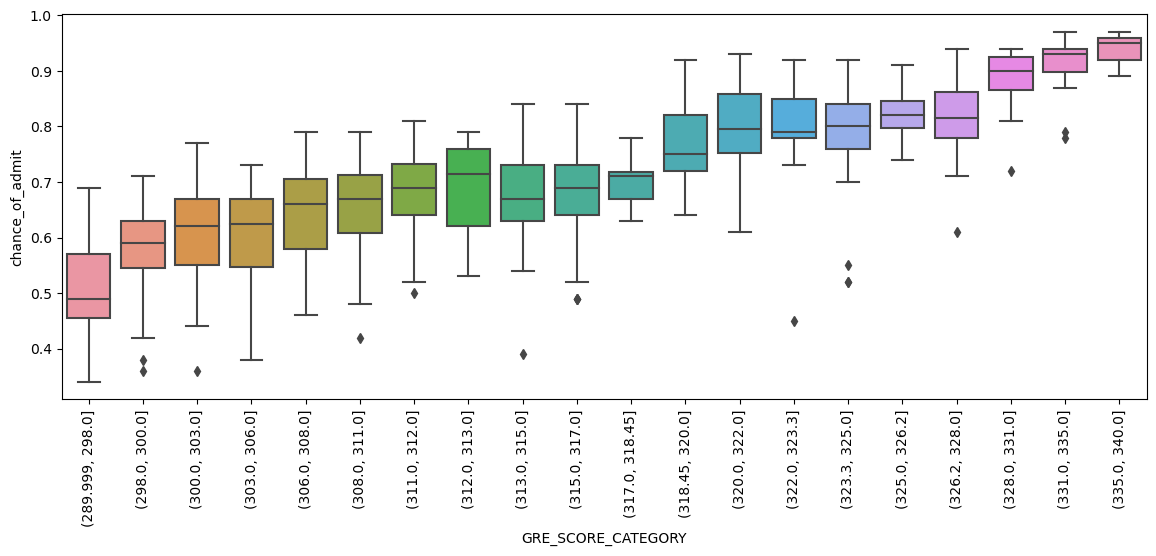

In [33]:
df["GRE_SCORE_CATEGORY"]=pd.qcut(df["gre_score"],20)
plt.figure(figsize=(14,5))
sns.boxplot(y = df["chance_of_admit"], x = df["GRE_SCORE_CATEGORY"])
plt.xticks(rotation = 90)
plt.show()

- As grn_score increases, the variance in chance_of_admit decreases.

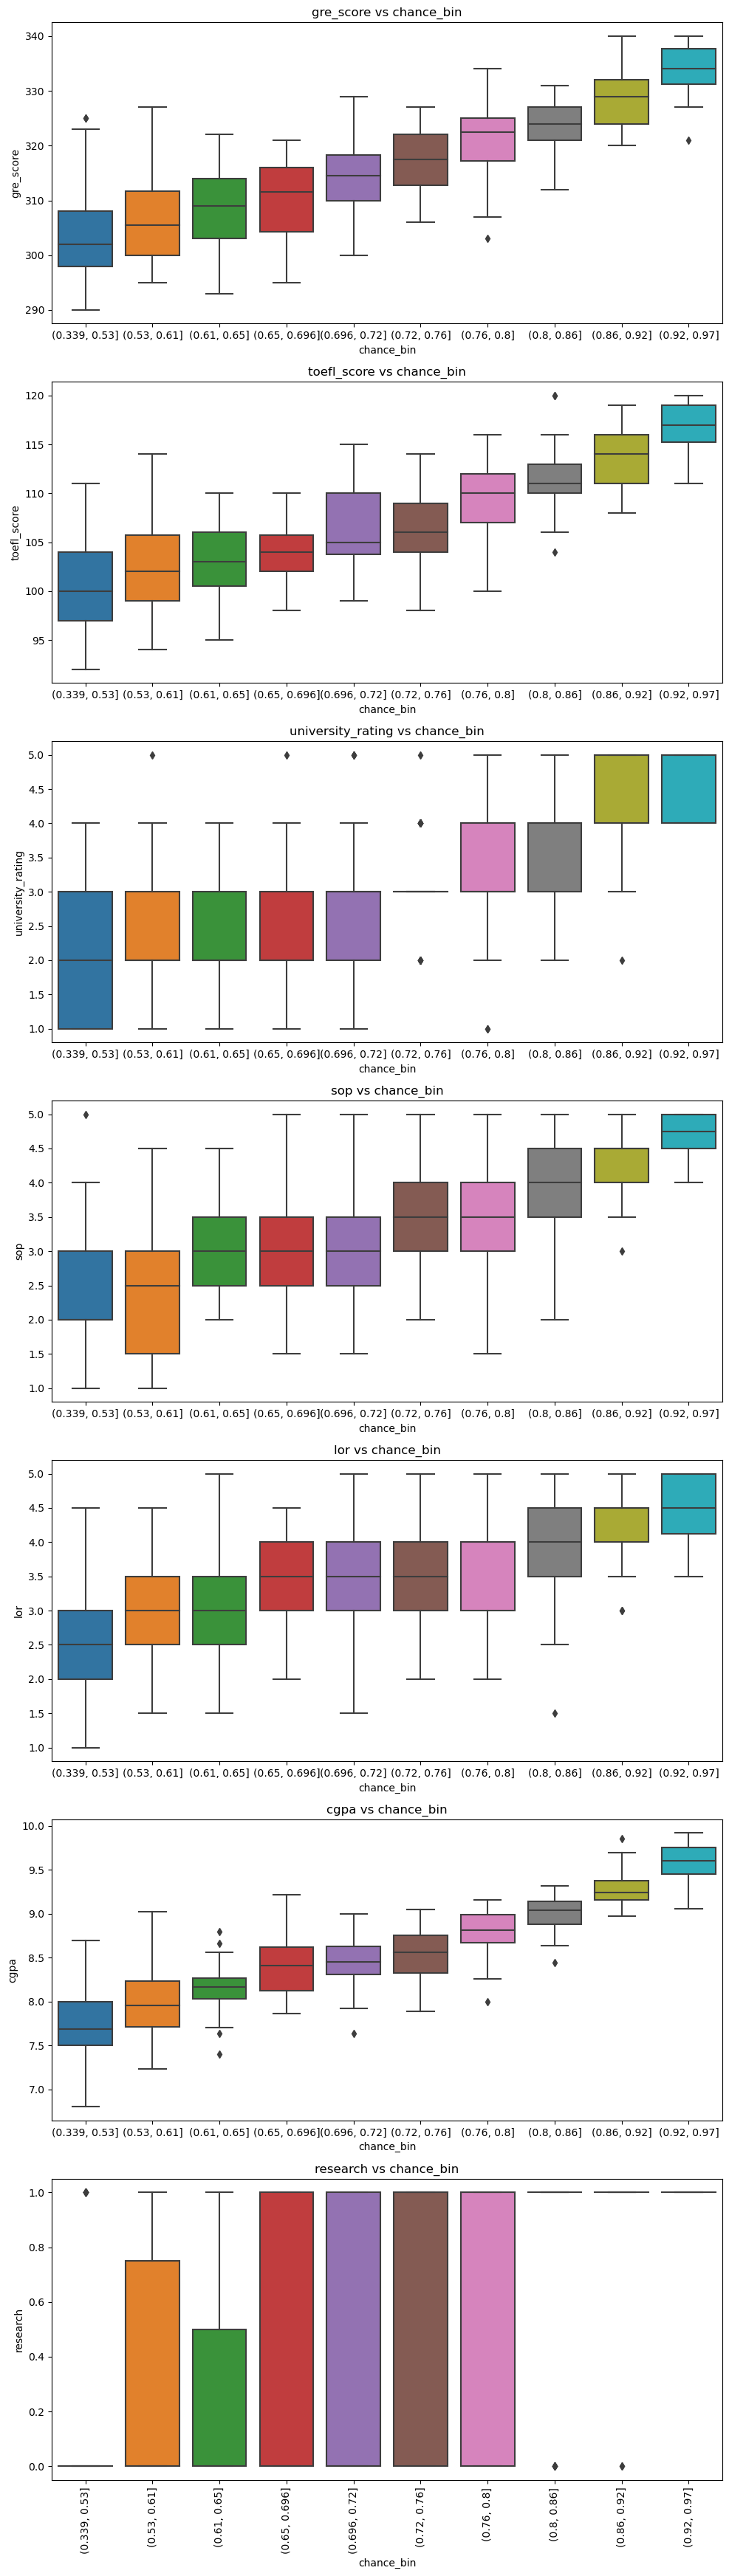

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define columns
# num_cols = ['gre_score', 'toefl_score', 'cgpa']
# cat_col = 'research'  # Can be any categorical column in your dataset

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Bin the target column into categories
df["chance_bin"] = pd.qcut(df["chance_of_admit"], q=10)
cat_col = "chance_bin"

# Select numeric columns excluding the categorical column
num_cols = df.select_dtypes(include='number').drop(columns=["chance_of_admit"]).columns

# Set up subplot grid
n = len(num_cols)
fig, axes = plt.subplots(n, 1, figsize=(10, 5*n))

# Plot each boxplot
for i, col in enumerate(num_cols):
    sns.boxplot(x=cat_col, y=col, data=df, ax=axes[i])
    plt.xticks(rotation = 90)
    axes[i].set_title(f'{col} vs {cat_col}')

plt.tight_layout()
plt.show()

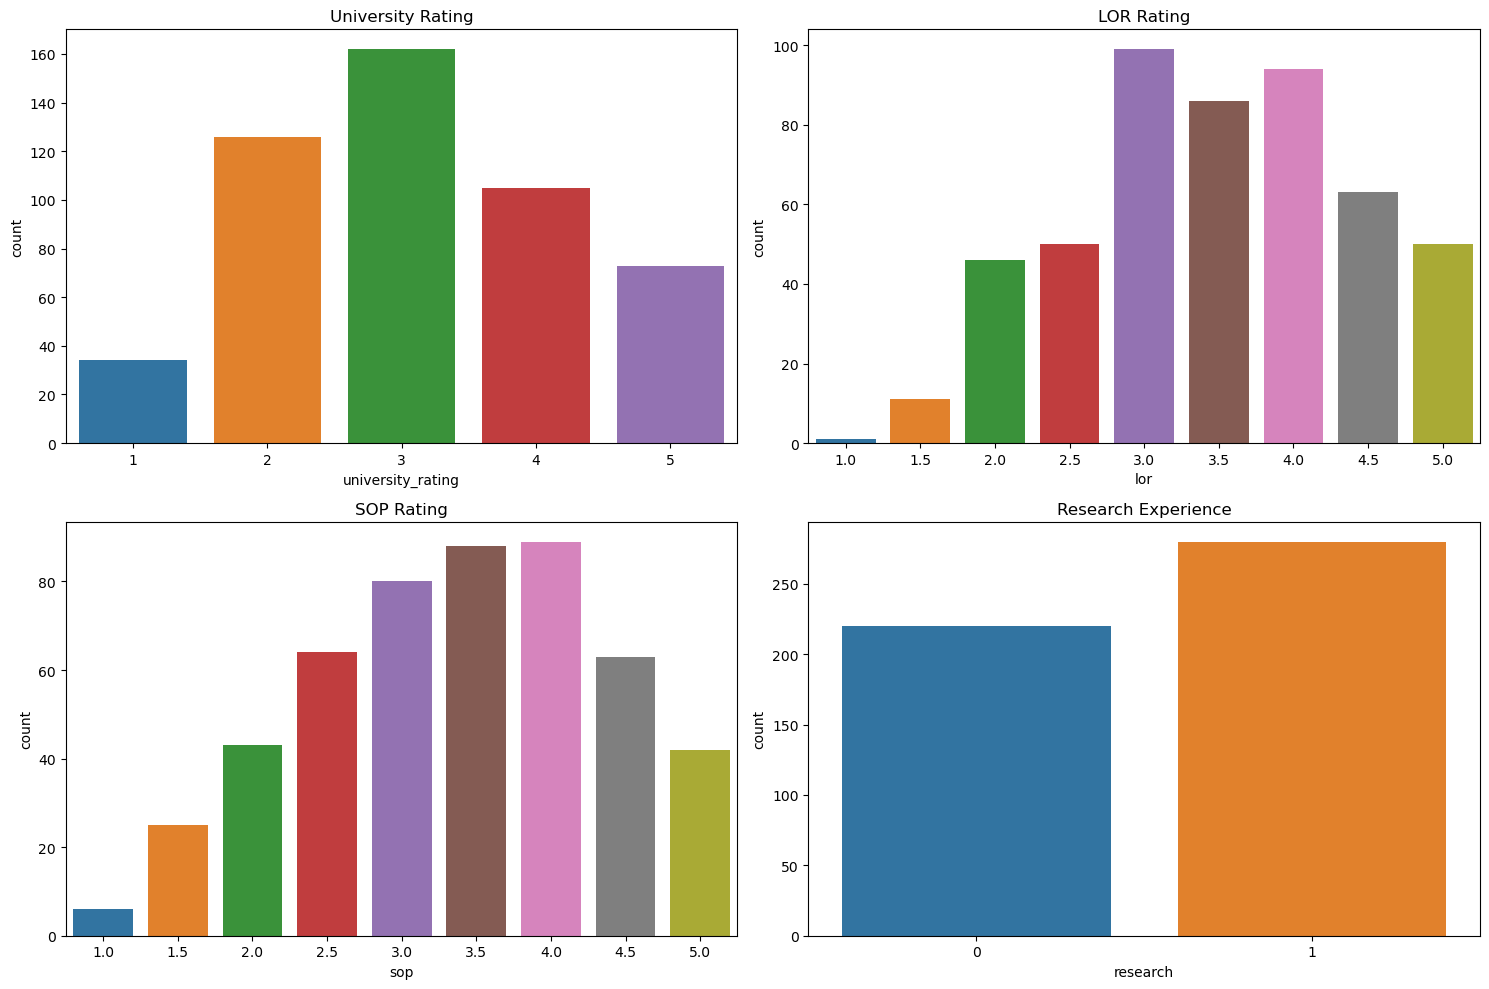

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x="university_rating", data=df)
plt.title("University Rating")

plt.subplot(2, 2, 2)
sns.countplot(x="lor", data=df)
plt.title("LOR Rating")

plt.subplot(2, 2, 3)
sns.countplot(x="sop", data=df)
plt.title("SOP Rating")

plt.subplot(2, 2, 4)
sns.countplot(x="research", data=df)
plt.title("Research Experience")

plt.tight_layout()
plt.show()


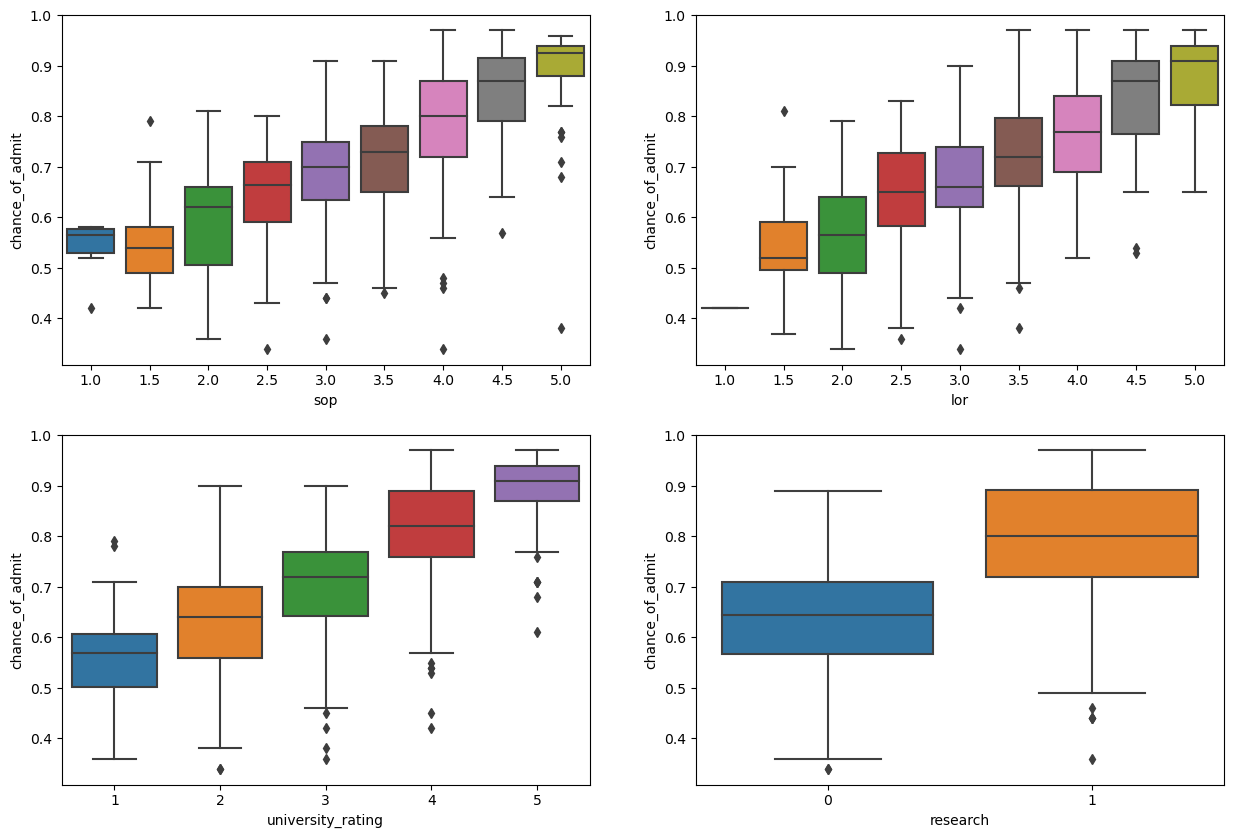

In [48]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(y = df["chance_of_admit"], x = df["sop"])
plt.subplot(2,2,2)
sns.boxplot(y = df["chance_of_admit"], x = df["lor"])
plt.subplot(2,2,3)
sns.boxplot(y = df["chance_of_admit"], x = df["university_rating"])
plt.subplot(2,2,4)
sns.boxplot(y = df["chance_of_admit"], x = df["research"])
plt.show()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     370.3
Date:                Fri, 18 Apr 2025   Prob (F-statistic):          1.49e-191
Time:                        16:45:39   Log-Likelihood:                -250.58
No. Observations:                 500   AIC:                             517.2
Df Residuals:                     492   BIC:                             550.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.483e-16      0.01

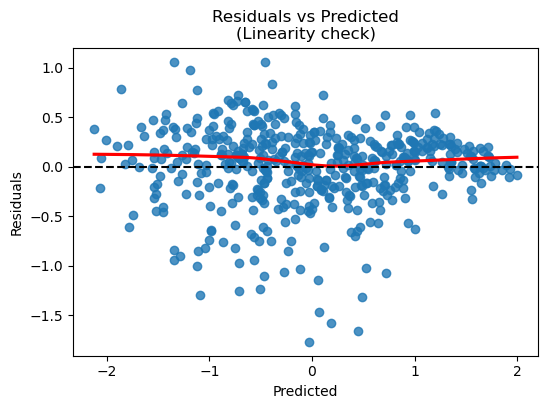

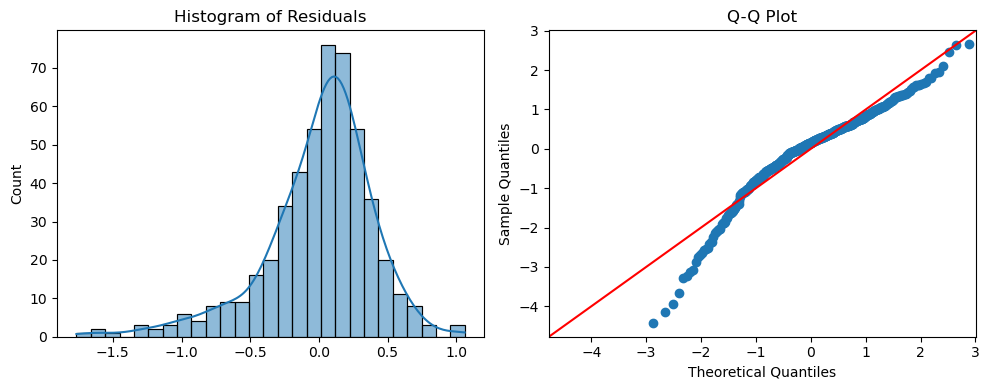

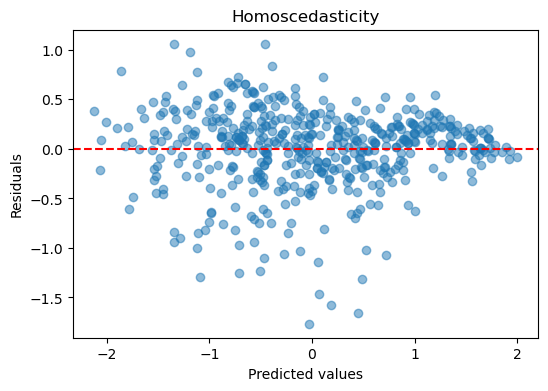

🔎 Variance Inflation Factor (VIF):
             Feature       VIF
0          gre_score  4.464249
1        toefl_score  3.904213
2  university_rating  2.621036
3                sop  2.835210
4                lor  2.033555
5               cgpa  4.777992
6           research  1.494008

🔍 Durbin-Watson Statistic: 0.812 (1.5 to 2.5 is generally okay)


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

X = df.drop(["chance_of_admit"],axis = 1) # independent variables
y = df["chance_of_admit"] # target / dependent 

import numpy as np

# y = y.max() + 1 - y      flip the y if its left skewed
# If values are all positive:
# y = np.log1p(y)      # log(1 + y) is safe for 0 values
# ordd
# y = np.sqrt(y)       # Square root transformation


# This automatically figures out the best transformation to normalize the data.
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')  # works with negative & positive
y = pt.fit_transform(y.values.reshape(-1, 1)).flatten()


# Assuming df is your DataFrame
# X = df.drop(columns=['target'])  # Replace 'target' with your actual target column
# y = df['target']

# Standardize features for better VIF & model performance
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Fit model with statsmodels OLS for residuals.
X_const = sm.add_constant(X_scaled)
model = sm.OLS(y, X_const).fit()
print(model.summary())               # OLS is good for Interpreting relationships, doing EDA.
y_pred = model.predict(X_const)
residuals = y - y_pred

# ----------- Assumption Checks -----------

## 1. Linearity
plt.figure(figsize=(6, 4))
sns.regplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals vs Predicted\n(Linearity check)")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

## 2. Normality of residuals
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='45', fit=True, ax=axes[1])
axes[1].set_title("Q-Q Plot")
plt.tight_layout()
plt.show()

## 3. Homoscedasticity
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Homoscedasticity")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()
# visually look for:
# No clear pattern or shape → ✅ Homoscedasticity
# Funnel or cone shape → ❌ Heteroscedasticity (non-constant variance of residuals)

## 4. Multicollinearity (VIF)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
print("🔎 Variance Inflation Factor (VIF):")
print(vif)

## 5. Independence of Errors (Durbin-Watson Test)
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)
print(f"\n🔍 Durbin-Watson Statistic: {dw:.3f} (1.5 to 2.5 is generally okay)")


- The initial model violated linear regression assumptions due to left-skewed residuals and heteroscedasticity. Applying PowerTransformer normalized the target and resolved the assumption breaches.
- VIF score are all below 5 , doesnt seem to have very high multicolinearity.

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error, adjusted_mutual_info_score
from sklearn.feature_selection import f_regression

In [166]:
X = df.drop(["chance_of_admit"],axis = 1) # independent variables
y = df["chance_of_admit"] # target / dependent variables

In [203]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === 1. Split the data ===
# X = df.drop("target_column", axis=1)
# y = df["target_column"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 2. Feature Scaling ===
scaler_X = StandardScaler()
# Fit only on training data
scaler_X.fit(X_train)
# Transform both train and test
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# === 3. Target Transformation ===
pt_y = PowerTransformer(method='yeo-johnson')
# Fit on y_train only
pt_y.fit(y_train.values.reshape(-1, 1))
# Transform y_train not y_test
y_train_trans = pt_y.transform(y_train.values.reshape(-1, 1)).flatten()

# === 4. Train the model ===
model = LinearRegression()
model.fit(X_train_scaled, y_train_trans)

# === 5. Predict and Inverse Transform ===
y_pred_trans = model.predict(X_test_scaled)
y_pred = pt_y.inverse_transform(y_pred_trans.reshape(-1, 1)).flatten()

# === 6. Evaluate the model ===
print("MAE          :",mean_absolute_error(y_test,y_pred) ) # MAE
print("MSE          :",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE         :",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("r2_score     :",r2_score(y_test,y_pred)) # r2score
def AdjustedR2score(R2,n,d):
    return 1-(((1-R2)*(n-1))/(n-d-1))
print("Adj R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1])) # adjusted R2 score

MAE          : 0.04324057334606098
MSE          : 0.0038272303353316366
RMSE         : 0.061864612949016635
r2_score     : 0.8128493723554212
Adj R2 score : 0.8101866601734862


In [191]:
ws = pd.DataFrame(model.coef_.reshape(1,-1),columns=df.columns[:-1])
ws["Intercept"] = model.intercept_
ws

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,Intercept
0,0.185325,0.141088,0.040008,0.019048,0.102184,0.473781,0.08853,5.223879e-16


In [82]:
def AdjustedR2score(R2,n,d):
    return 1-(((1-R2)*(n-1))/(n-d-1))

In [84]:
from sklearn.linear_model import Ridge # L2 regualrization
from sklearn.linear_model import Lasso # L1 regualrization
from sklearn.linear_model import ElasticNet

In [143]:
## Hyperparameter Tuning : for appropriate lambda value :
train_R2_score = []
test_R2_score = []
lambdas = []
train_test_difference_Of_R2 = []
lambda_ = 0
while lambda_ <= 5:
 lambdas.append(lambda_)
 RidgeModel = Ridge(lambda_)
 RidgeModel.fit(X_train,y_train)
 trainR2 = RidgeModel.score(X_train,y_train)
 testR2 = RidgeModel.score(X_test,y_test)
 train_R2_score.append(trainR2)
 test_R2_score.append(testR2)

 lambda_ += 0.01

Text(0.5, 0, 'Alpha (Lambda)')

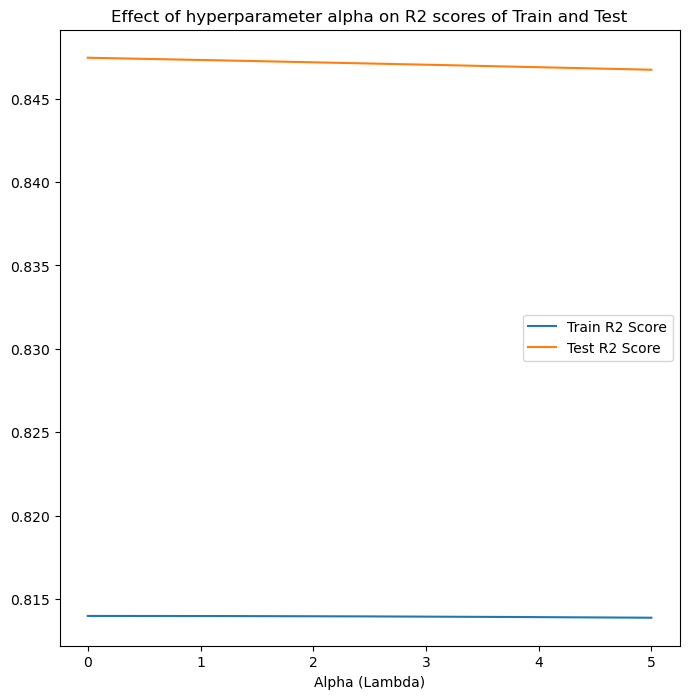

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))

sns.lineplot(x=lambdas, y=train_R2_score, label='Train R2 Score')
sns.lineplot(x=lambdas, y=test_R2_score, label='Test R2 Score')

plt.legend()
plt.title("Effect of hyperparameter alpha on R2 scores of Train and Test")
plt.xlabel("Alpha (Lambda)")


In [89]:
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(X_train,y_train)
trainR2 = RidgeModel.score(X_train,y_train)
testR2 = RidgeModel.score(X_test,y_test)

In [90]:
trainR2,testR2

(0.8139973134417274, 0.847431070638297)

In [91]:
RidgeModel.coef_


array([ 0.01941315,  0.02134009,  0.00897262, -0.00184787,  0.0151891 ,
        0.06873958,  0.01368545])

In [92]:
RidgeModel_coefs = pd.DataFrame(RidgeModel.coef_.reshape(1,-1),columns=df.columns[:-1])
RidgeModel_coefs["Intercept"] = RidgeModel.intercept_
RidgeModel_coefs

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,Intercept
0,0.019413,0.02134,0.008973,-0.001848,0.015189,0.06874,0.013685,0.720735


In [95]:
LinearRegression_Model_coefs

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,Intercept
0,0.019392,0.021328,0.008967,-0.001866,0.015185,0.068806,0.013684,0.720735


In [96]:
y_pred = RidgeModel.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1])) # adjusted R2 score

MSE: 0.003276912081373705
RMSE: 0.0572443192061335
MAE : 0.0428439349358985
r2_score: 0.847431070638297
Adjusted R2 score : 0.845260374488842


In [105]:
from scipy import stats


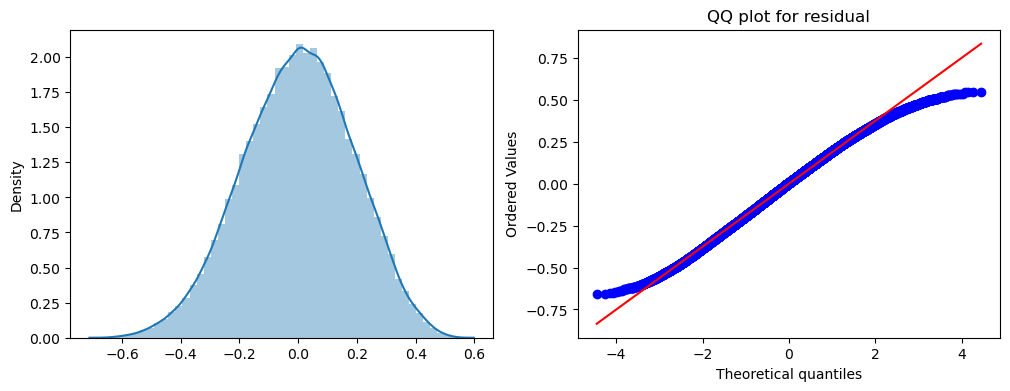

In [106]:
y_predicted = RidgeModel.predict(X_train)
residuals = (y_train - y_predicted)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(residuals)
plt.subplot(1,2,2)
stats.probplot(residuals.reshape(-1,), plot = plt)
plt.title('QQ plot for residual')
plt.show()


In [98]:
## Hyperparameter Tuning : for appropriate lambda value :
train_R2_score = []
test_R2_score = []
lambdas = []
train_test_difference_Of_R2 = []
lambda_ = 0
while lambda_ <= 5:
 lambdas.append(lambda_)
 ElasticNet_model = ElasticNet(alpha=lambda_)
 ElasticNet_model.fit(X_train , y_train)
 trainR2 = ElasticNet_model.score(X_train,y_train)
 testR2 = ElasticNet_model.score(X_test,y_test)
 train_R2_score.append(trainR2)
 test_R2_score.append(testR2)

 lambda_ += 0.001

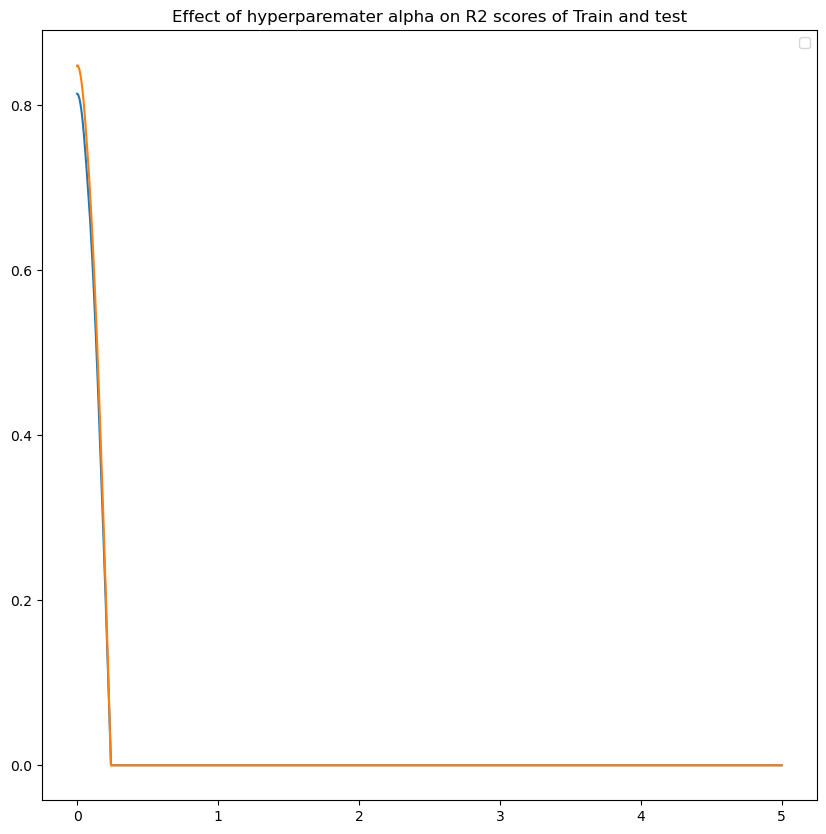

In [101]:
plt.figure(figsize = (10,10))

sns.lineplot(x=lambdas, y=train_R2_score, label='Train R2 Score')
sns.lineplot(x=lambdas, y=test_R2_score, label='Test R2 Score')

plt.legend('Train R2 Score','Test R2 score')
plt.title("Effect of hyperparemater alpha on R2 scores of Train and test")
plt.show()

In [118]:
LassoModel = Lasso(alpha=0.001)
LassoModel.fit(X_train , y_train)
trainR2 = LassoModel.score(X_train,y_train)
testR2 = LassoModel.score(X_test,y_test)
trainR2,testR2

(0.8138509596628304, 0.8485319532522135)

In [119]:
Lasso_Model_coefs = pd.DataFrame(LassoModel.coef_.reshape(1,-1),columns=df.columns[:-1])
Lasso_Model_coefs["Intercept"] = LassoModel.intercept_
Lasso_Model_coefs

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,Intercept
0,0.019332,0.020772,0.007958,0.0,0.014238,0.068565,0.013121,0.720717


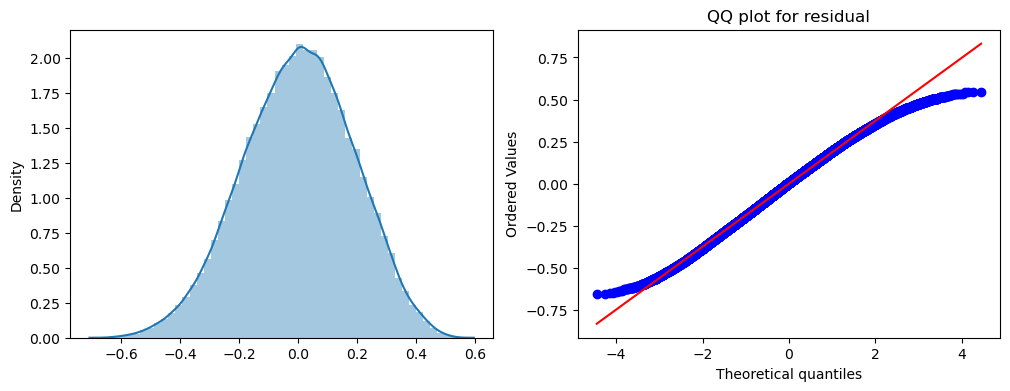

In [120]:
y_predicted = LassoModel.predict(X_train)
residuals = (y_train - y_predicted)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(residuals)
plt.subplot(1,2,2)
stats.probplot(residuals.reshape(-1,), plot = plt)
plt.title('QQ plot for residual')
plt.show()

In [121]:
y_pred = LassoModel.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1])) # adjusted R2 score

MSE: 0.0032532670603801785
RMSE: 0.057037418072526554
MAE : 0.0427359435914732
r2_score: 0.8485319532522135
Adjusted R2 score : 0.8463769200667776


In [102]:
ElasticNet_model = ElasticNet(alpha=0.001)
ElasticNet_model.fit(X_train , y_train)
trainR2 = ElasticNet_model.score(X_train,y_train)
testR2 = ElasticNet_model.score(X_test,y_test)

In [103]:
trainR2,testR2

(0.8139136126561637, 0.8484721696409268)

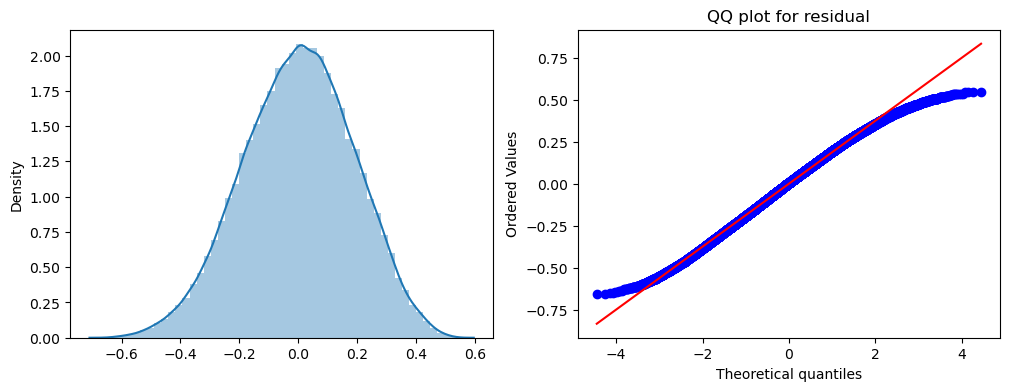

In [107]:
y_predicted = ElasticNet_model.predict(X_train)
residuals = (y_train - y_predicted)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(residuals)
plt.subplot(1,2,2)
stats.probplot(residuals.reshape(-1,), plot = plt)
plt.title('QQ plot for residual')
plt.show()


In [108]:
y_pred = ElasticNet_model.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1])) # adjusted R2 score

MSE: 0.003254551107131461
RMSE: 0.057048673140849306
MAE : 0.042774455796623444
r2_score: 0.8484721696409268
Adjusted R2 score : 0.8463162858756554


In [109]:
ElasticNet_model_coefs = pd.DataFrame(ElasticNet_model.coef_.reshape(1,-1),columns=df.columns[:-1])
ElasticNet_model_coefs["Intercept"] = ElasticNet_model.intercept_
ElasticNet_model_coefs


,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,Intercept
0,0.019438,0.020951,0.008124,-0.0,0.014505,0.068374,0.013405,0.720712


In [110]:
y_pred = ElasticNet_model.predict(X_test)
ElasticNet_model_metrics = []
ElasticNet_model_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
ElasticNet_model_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
ElasticNet_model_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
ElasticNet_model_metrics.append(r2_score(y_test,y_pred)) # r2score
ElasticNet_model_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1])) # adjusted R2 score


In [111]:
y_pred = LinearRegression.predict(X_test)
LinearRegression_model_metrics = []
LinearRegression_model_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
LinearRegression_model_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
LinearRegression_model_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
LinearRegression_model_metrics.append(r2_score(y_test,y_pred)) # r2score
LinearRegression_model_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1])) # adjusted R2 score

In [112]:
y_pred = RidgeModel.predict(X_test)
RidgeModel_model_metrics = []
RidgeModel_model_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
RidgeModel_model_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
RidgeModel_model_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
RidgeModel_model_metrics.append(r2_score(y_test,y_pred)) # r2score
RidgeModel_model_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1])) # adjusted R2 score


In [122]:
y_pred = LassoModel.predict(X_test)
LassoModel_model_metrics = []
LassoModel_model_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
LassoModel_model_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
LassoModel_model_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
LassoModel_model_metrics.append(r2_score(y_test,y_pred)) # r2score
LassoModel_model_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1])) # adjusted R2 score


In [124]:
RidgeModel_model_metrics

[0.003276912081373705,
 0.0572443192061335,
 0.0428439349358985,
 0.847431070638297,
 0.845260374488842]

In [133]:
A = pd.DataFrame([LinearRegression_model_metrics,LassoModel_model_metrics,RidgeModel_model_metrics,ElasticNet_model_metrics],columns=["MSE","RMSE","MAE","R2_SCORE","ADJUSTED_R2"], index=["Linear Regression Model","Lasso Regression Model","Ridge Regression Model","ElasticNet Regression Model"])
A

,MSE,RMSE,MAE,R2_SCORE,ADJUSTED_R2
Linear Regression Model,0.003277,0.057242,0.042840,0.847444,0.845274
Lasso Regression Model,0.003253,0.057037,0.042736,0.848532,0.846377
Ridge Regression Model,0.003277,0.057244,0.042844,0.847431,0.845260
ElasticNet Regression Model,0.003255,0.057049,0.042774,0.848472,0.846316


In [134]:
B = pd.DataFrame(LinearRegression_Model_coefs.append(Lasso_Model_coefs).append(RidgeModel_coefs).append(ElasticNet_model_coefs))
B.index = ["Linear Regression Model","Lasso Regression Model","Ridge Regression Model","ElasticNet Regression Model"]


In [137]:
REPORT = B.reset_index().merge(A.reset_index()).set_index("index")
REPORT

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,Intercept,MSE,RMSE,MAE,R2_SCORE,ADJUSTED_R2
index,,,,,,,,,,,,,
Linear Regression Model,0.019392,0.021328,0.008967,-0.001866,0.015185,0.068806,0.013684,0.720735,0.003277,0.057242,0.042840,0.847444,0.845274
Lasso Regression Model,0.019332,0.020772,0.007958,0.000000,0.014238,0.068565,0.013121,0.720717,0.003253,0.057037,0.042736,0.848532,0.846377
Ridge Regression Model,0.019413,0.021340,0.008973,-0.001848,0.015189,0.068740,0.013685,0.720735,0.003277,0.057244,0.042844,0.847431,0.845260
ElasticNet Regression Model,0.019438,0.020951,0.008124,-0.000000,0.014505,0.068374,0.013405,0.720712,0.003255,0.057049,0.042774,0.848472,0.846316


<Axes: xlabel='ElasticNet Regression Model'>

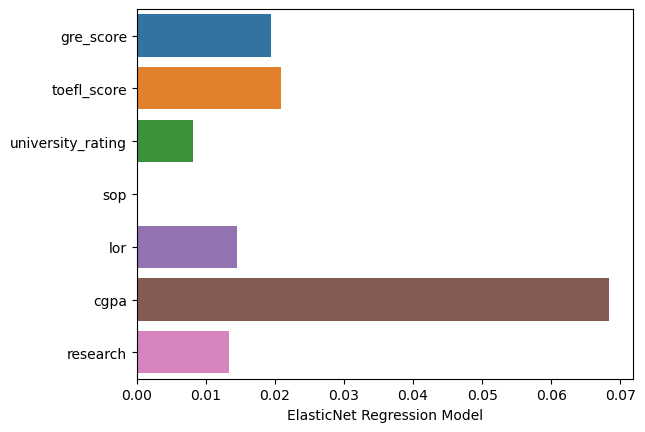

In [140]:
sns.barplot(y = REPORT.loc["ElasticNet Regression Model"][0:7].index,
 x = REPORT.loc["ElasticNet Regression Model"][0:7])

In [198]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# ==== 1. Prepare your data ====
# X = df.drop("target_column", axis=1)
# y = df["target_column"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==== 2. Scale features ====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==== 3. Define Models & Hyperparameters ====

# Ridge: L2 Regularization
ridge_params = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Strength of regularization
}

# Lasso: L1 Regularization
lasso_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],  # Controls how many features get zeroed out
    'max_iter': [10000]  # Ensures convergence
}

# ElasticNet: Combo of L1 & L2
elastic_params = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9],  # 0.0 = Ridge, 1.0 = Lasso
    'max_iter': [10000]
}

# ==== 4. Perform Grid Search for Each Model ====

def tune_and_evaluate(model, param_grid, name):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='r2')
    grid.fit(X_train_scaled, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    # Evaluation metrics
    print(f"\n✅ {name} Best Parameters: {grid.best_params_}")
    print(f"R² Score      : {r2_score(y_test, y_pred):.4f}")
    print(f"MAE           : {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"RMSE          : {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    return best_model

# Run tuning and evaluation
ridge_model = tune_and_evaluate(Ridge(), ridge_params, "Ridge Regression")
lasso_model = tune_and_evaluate(Lasso(), lasso_params, "Lasso Regression")
elastic_model = tune_and_evaluate(ElasticNet(), elastic_params, "ElasticNet Regression")


✅ Ridge Regression Best Parameters: {'alpha': 10}
R² Score      : 0.8183
MAE           : 0.0429
RMSE          : 0.0610

✅ Lasso Regression Best Parameters: {'alpha': 0.001, 'max_iter': 10000}
R² Score      : 0.8192
MAE           : 0.0425
RMSE          : 0.0608

✅ ElasticNet Regression Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 10000}
R² Score      : 0.8190
MAE           : 0.0426
RMSE          : 0.0608


In [199]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# # ==== 1. Load and Split Data ====
# X = df.drop("target_column", axis=1)
# y = df["target_column"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==== 2. Scale Features ====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==== 3. Define Models ====
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01, max_iter=10000),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "SVR": SVR(kernel='rbf', C=1.0),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# ==== 4. Evaluate Models ====
def evaluate_model(name, model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"\n🔹 {name}")
    print(f"R² Score : {r2:.4f}")
    print(f"MAE      : {mae:.4f}")
    print(f"RMSE     : {rmse:.4f}")

# Run evaluation
for name, model in models.items():
    evaluate_model(name, model)



🔹 Linear Regression
R² Score : 0.8188
MAE      : 0.0427
RMSE     : 0.0609

🔹 Ridge
R² Score : 0.8188
MAE      : 0.0427
RMSE     : 0.0609

🔹 Lasso
R² Score : 0.8140
MAE      : 0.0427
RMSE     : 0.0617

🔹 ElasticNet
R² Score : 0.6649
MAE      : 0.0643
RMSE     : 0.0828

🔹 KNN
R² Score : 0.7802
MAE      : 0.0464
RMSE     : 0.0670

🔹 Decision Tree
R² Score : 0.6828
MAE      : 0.0549
RMSE     : 0.0805

🔹 Random Forest
R² Score : 0.7887
MAE      : 0.0438
RMSE     : 0.0657

🔹 Gradient Boosting
R² Score : 0.7826
MAE      : 0.0462
RMSE     : 0.0667

🔹 SVR
R² Score : 0.7589
MAE      : 0.0564
RMSE     : 0.0702

🔹 Neural Network
R² Score : 0.4738
MAE      : 0.0785
RMSE     : 0.1037
